## Forecasting Principles and Practices Notes

If you think about it, time series forecasting is inherently a extrapolating problem (interpolating would be predicting in the past).

### Chapter 1 : Overview and Motivation

The predictability of an event or a quantity depends on several factors including:

1.   how well we understand the factors that contribute to it
2.   how much data is available
3.   how similar the future is to the past
4.   Whether the forecasts can affect the thing we are trying to forecast (think of exchange rates)


*The efficient-market hypothesis is a hypothesis in financial economics that states that asset prices reflect all available information.*

Good forecasts capture the genuine patterns and relationships which exist in the historical data, but do not replicate past events that will not occur again.

Forecast horizon, forecasts required one month in advance, six months, one year?

If there are no data available or if the data is not relevant to forecasting than **qualitaitve forecasting** methods must be used (Chapter 6)

General equation for Dynamic Regression Models, Panel Data Models, Longitudinal Models, Transfer Function Models, and Linear System Models (assuming that f is linear).

<center> $ ED_{t+1} = f(ED_{t}, current temperature, time of day, day of week, error)$ </center>

**Forecasting Framework**:

1.  Problem Definition
2.  Gathering Information
3.  Preliminary Analysis
4.  Training and model selection
5.  Model evaluation and deployment


**Statistical Forecasting Perspective**

The underlying assumption is that the target variable is a random variable and we are trying to forecast teh middle of the range of the possible values (also calles as point forecasts). The point forecasts are accompanied with prediction intervals.

We think of the target varaible to follow a forecast distribution denoted by $y_t | I$.


### Chapter 2 : Time Series Graphics

In R time series data can be stored as a `tsibble` object.

*`tsibble` objects extend tidy data frames (`tibble` objects) by introducing temporal structure.*


Autocorrelation function measures the linear relationship between lagged values of a time series.

ACF value $r_k$ can be denoted as:

$ r_k = \frac{\sum_{t = k + 1}^{T} (y_t - \bar y)(y_{t-k} - \bar y)} {\sum_{t = 1}^{T} (y_t - \bar y)^2}$

**White Noise**

Time series that show no autocorrelation are called whie noise. We expect each autocorrelation to be close to zero, however realistically we expect the the 95% of the spikes in the ACF to lie within $\pm
 2/ \sqrt{T}$

### Chapter 3 : Time Series Decomposition

  Componenets of time series:
  1.  Trend-Cycle component ($T_t$)
  2.  Seasonal component($S_t$) (can be multiple , corresponding to different seasonal periods)
  3.  Noise/Remainder component ($R_t$)


  Tranformations and Adjustments:
  1.  Calendar Adjustments:
  2.  Population Adjustments
  3.  Inflation Adjustments
  4.  Mathematical Transformations
      -  Log
      -  Power
      -  Box-Cox : *A good value of λ is one which makes the size of the seasonal variation about the same across the whole series* guerrero?? help choose λ.


Decomposition of time series:
1.  Additive : Most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series.

<center> $ y_t = S_t + T_t + R_t $ </center>

2.  Multiplicative : When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate. *Consider log transformation*

<center> $y_t = S_t x T_t x R_t$</center>

*If the variation due to seasonality is not of primary interest, the seasonally adjusted series can be useful*


Moving Averages:
*Motivation behind this is to be able to estimate the trend component*

A moving average of order m (m-MA) can be written as
<center> $\hat{T}_t = \frac{1}{m} \sum_{j = -k}^{j = k}y_{t+j}$ </center>

The motivation behind applying moving average of moving averages is to make even-order moving average symmetric.


*Even order MA to followed by even order MA and odd order MA to be followed by odd order MA to make it symmetric.*

Weighted Moving Averages: A major advantage of weighted moving averages is that they yield a smoother estimate of the trend-cycle. Instead of observations entering and leaving the calculation at full weight, their weights slowly increase and then slowly decrease, resulting in a smoother curve.

**Classical method of decomposition:**

*Assumption is that seasonal component is constant from year to year.*
1.  Compute trend-cycle component
2.  Deternd the series
3.  Estimate the seasonal component
4.  Compute Remainder component

Drawbacks:

- Unavailable for the first and last dew observations.
- Trend-cycle over-smooths rapid rises and falls in the data
- Seasonal component assumption not necessarily holds true especially for longer series (unable to capture seasonal changes over time).
-  Not robust to unusal sudden changes in the data.

Better methods are X-11, SEATS(Seasonal Extraction in ARIMA Time Series) and STL(Season and Trend Decomposition using Loess).

### Chapter 4 : Time Series Features

Features related to ACF:
-  the first autocorrelation coefficient from the original data;
-  the sum of squares of the first ten autocorrelation coefficients from the original data;
-  the first autocorrelation coefficient from the differenced data;
-  the sum of squares of the first ten autocorrelation coefficients from the differenced data;
-  the first autocorrelation coefficient from the twice differenced data;
-  the sum of squares of the first ten autocorrelation coefficients from the twice differenced data;
-  For seasonal data, the autocorrelation coefficient at the first seasonal lag is also returned.


*STL Decomposition*:

For strongly trended data, the seasonally adjusted data should have much more variation than the remainder component. Therefore $Var(R_t)/Var(R_t + T_t)$  should be relatively small.


Similarly for strongly seasoned data, the detrended data should have much more variation than the remainder component. Therefore $Var(R_t)/Var(R_t + S_t)$  should be relatively small


*Additional Features*:
-  Hurst coefficient of a time series which is a measure of “long memory”
-  Shannon/ Spectral entropy of a time series, which is a measure of how easy the series is to forecast
-   Box-Pierce statistic for testing if a time series is white noise
-   Ljung-Box statistic for testing if a time series is white noise
-   The k th partial autocorrelation measures the relationship between observations k periods apart after removing the effects of observations between them
-   Kwiatkowski-Phillips-Schmidt-Shin (KPSS) statistic for testing if a series is stationary
- Phillips-Perron statistic for testing if a series is non-stationary
-  number of differences required to lead to a stationary series based on the KPSS test
-  "stability” feature:  the means of consecutive non-overlapping blocks of observations
-  "lumpiness" feature:  the variance of consecutive non-overlapping blocks of observations
Read more : https://otexts.com/fpp3/other-features.html


Think : All this features can be used to detect anomalous points (after some dimensionality reduction method).


### Chapter 5 : The forecaster's Toolbox


<center> Tidy Forecasting Workflow

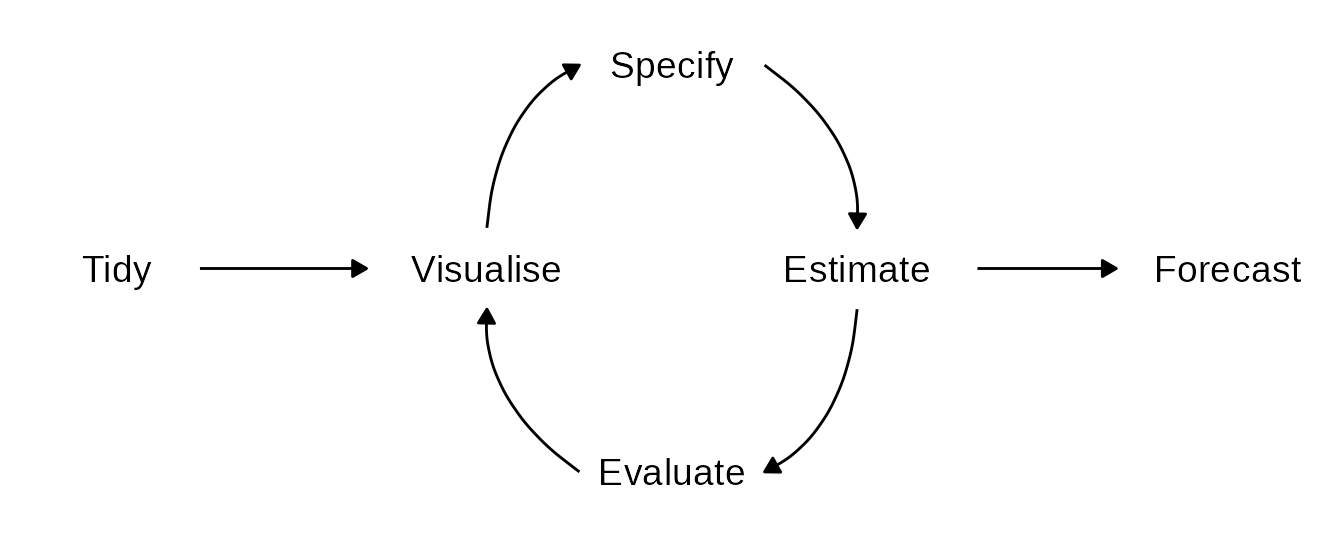</center>

**Benchmark/Baseline Models**

1.  Mean Method: Forecast of all future values are equal to the mean of the historical data.

<center>$\hat y_{T+h|T} = \bar y = (y_1 + y_2 + . . . . + y_T)/T$</center>

2. Naïve Method:  All forecasts to be the value of the last observation.
<center>$\hat y_{T+h|T} =  y_T $</center>

3. Seasonal naïve method: Each forecast to be equal to the last observed value from the same season (useful for highly seasoned data).
<center>$\hat y_{T+h|T} =  y_{T+h-m(k+1)}$</center>
where, m = the seasonal period and k is the integer part of (h-1)/m

4. Drift Method: Variation of the naive method, here we allow the forecasts to increase or decrease over time, where the drift (amount of change over time) is set to the average seen in the historical data.
(Equivalent to drawing a line between the first and last observation and then extrapolating it).

<center>$\hat y_{T+h|T} =  y_T  + \frac{h}{T-1} ∑_{t=2}^T (y_t - y_{t-1}) = y_t + h(\frac{y_T - y_1}{T-1})$</center>


Innovation Residuals: Residuals on the transformed scale (same as the one used in the model).

If patterns are observable in the innovation residuals, the model can probably be improved.

Checks on innovation residuals for good model:
1.  The innovation residuals are uncorrelated. (Think of it if there is information in the residuals then some feature is missing in the model). (Check the ACF plot of residuals).
2.  The innovation residuals have zero mean (if not zero then the residuals are biased). (Just subtract the mean from the forecasts bias poof)
---- Desirable
3.  The innovation residuals have constant variance (homoskedacity)
4.  The innovation residuals are normally distributed. (Think of calculating prediction intervals).

Sometimes Box-Cox Transformation should work.



Test for Autocorrelation:

Motivation: Considering a whole set of $r_k$ values as a group, rather than treating each one separately.

To overcome false positives, we test whether the first *l* autocorrelation are significantly different from waht would be expected in a white noise process.

A test for a group of autocorrelations is called as Portmanteau Test.

**Box-Pierce Test**:

<center>$Q = T \sum_{k=1}^{ℓ} r_{k}^2$</center>

Here ℓ is the maximum lag being considered. l is set to 10 for non seasonal data and 2m for seasonal data (m is the period of seasonality).

The test is not good when ℓ is large, so if values are larger than T/5 we use ℓ = T/5.

Large value of Q sugest that the autocorrelations do not come from a white noise process.

**Ljung-Box Test**
More accurate
<center>$Q^* = T(T+1) \sum_{k=1}^{ℓ} (T-k)^{-1} r_{k}^2$</center>


If the autocorrelations did come from a white noise series, then both Q and $Q^*$ would have a $χ^2$ distribution with $ℓ$ degrees of freedom
